## t-Test 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diamond = pd.read_excel('datasets/Inferential_Statistics.xlsx', sheet_name = 'Sheet1')
diamond

,IDNO.,WEIGHT,COLOR,CLARRITY,RATER,PRICE
0,1,0.31,D,VS1,GIA,1641
1,2,0.31,I,VS1,GIA,1126
2,3,0.34,E,VS1,GIA,1693
3,4,0.34,H,VS2,GIA,1222
4,5,0.36,F,VS1,GIA,1635
5,6,0.40,H,VS1,GIA,1525
6,7,0.48,G,VVS2,GIA,2532
7,8,0.50,G,VS1,GIA,3016
8,9,0.52,F,VVS2,GIA,3635
9,10,0.53,G,VVS2,GIA,3407


In [3]:
diamond['WEIGHT'].mean()

0.5539999999999999

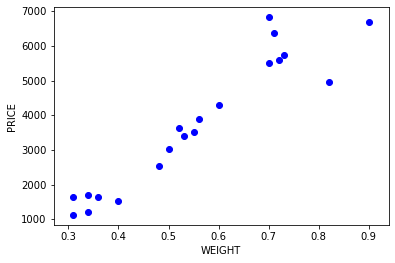

In [4]:
plt.scatter(diamond['WEIGHT'],diamond['PRICE'], color = 'blue')
plt.xlabel('WEIGHT')
plt.ylabel('PRICE')
plt.show()

In [5]:
# performing one-sample t-Test the significance value is 0.05
stats.ttest_1samp(diamond['WEIGHT'],0.5) #0.5 is the average weight
# since the p-value>SV we accept the null hyposthesis.
#Our p-value comes out to be 0.19016924006729957 which is greater than 0.05 (5% significance level) therefore,
#we accept the null hypothesis which states that mean is statically greater than 0.5 and is not due to random chance.

Ttest_1sampResult(statistic=1.358653216241876, pvalue=0.19016924006729957)

## Independence t-Test

In [6]:
age = pd.read_excel('datasets/Inferential_Statistics.xlsx', sheet_name = 'Sheet2')
age

,patid,age,gender
0,1,45,Male
1,2,56,Male
2,3,50,Male
3,4,46,Female
4,5,64,Male
5,6,49,Female
6,7,63,Male
7,8,63,Female
8,9,52,Male
9,10,45,Male


In [7]:
#Extracting a combination of observations
#separating the gender group by age
Female_age = age[age['gender'] == 'Female']['age']
Male_age = age[age['gender'] == 'Male']['age']
print(Female_age)
print(Male_age)

3     46
5     49
7     63
10    61
11    49
12    61
15    60
Name: age, dtype: int64
0     45
1     56
2     50
4     64
6     63
8     52
9     45
13    59
14    52
Name: age, dtype: int64


In [8]:
print('Female_age mean: ', Female_age.mean())
print('Male_age mean: ', Male_age.mean())

Female_age mean:  55.57142857142857
Male_age mean:  54.0


In [9]:
#Running indipendence t-Test
stats.ttest_ind(a=Female_age, b=Male_age, equal_var=False)
#Our null hypothesis is that both groups are statistically significantly similar.Here,the p-value is greater than 0.05,
#therefore,we accept the null hypothesis that these two groups are significantly similar

Ttest_indResult(statistic=0.43715320177431105, pvalue=0.6692391116588792)

## F-Test 

In [10]:
stats.f_oneway(Female_age,Male_age)

F_onewayResult(statistic=0.19234457004440855, pvalue=0.6676644357450678)

## Paired t-Test

In [11]:
score = pd.read_excel('datasets/Inferential_Statistics.xlsx', sheet_name = 'Sheet3')
score

,Student,Test A,Test B
0,1,9,17
1,2,10,24
2,3,12,17
3,4,16,19
4,5,16,15
5,6,17,16
6,7,9,15
7,8,9,25
8,9,13,15
9,10,13,25


In [12]:
before = score['Test A']
after = score['Test B']

In [13]:
#Running paired t-Test
stats.ttest_rel(before,after)
#We find that the p-value comes out to be 1.2167687282184405e-06 which is very less than 0.05 (significance level of 5%).
#Therefore, we reject the null hypothesis i.e. these test scores are significantly different from each other.

Ttest_relResult(statistic=-6.970438606669267, pvalue=1.2167687282184405e-06)

## Correlation Coefficients

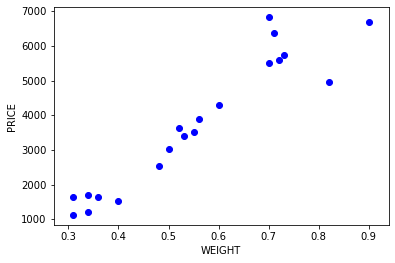

In [14]:
plt.scatter(diamond['WEIGHT'],diamond['PRICE'], color = 'blue')
plt.xlabel('WEIGHT')
plt.ylabel('PRICE')
plt.show()

In [15]:
diamond['WEIGHT'].corr(diamond['PRICE']) #positive correlation

0.9457713913032358

In [16]:
#Correlation Coefficient Matrix
#Here all the diagonal values will be 1 while correlation coefficient will be there for all the
#combination of the numerical variables.
#There are two methods of calculating  Correlation Coefficient and its matrix – Pearson and Spearman.
diamond.corr(method= 'pearson')

,IDNO.,WEIGHT,PRICE
IDNO.,1.000000,0.893409,0.925019
WEIGHT,0.893409,1.000000,0.945771
PRICE,0.925019,0.945771,1.000000


In [17]:
diamond.corr(method= 'spearman')

,IDNO.,WEIGHT,PRICE
IDNO.,1.000000,0.928115,0.921805
WEIGHT,0.928115,1.000000,0.925104
PRICE,0.921805,0.925104,1.000000


## Chi-Square Test 

In [18]:
smoke = pd.read_excel('datasets/Inferential_Statistics.xlsx', sheet_name='Sheet4')
smoke

,ID,Gender,Smoke
0,1,M,yes
1,2,M,yes
2,3,F,no
3,4,F,no
4,5,F,yes
5,6,F,no
6,7,F,no
7,8,M,yes
8,9,M,no
9,10,F,yes


In [19]:
#Frequency table using both the categorical variables.
smoke_tab = pd.crosstab(index=smoke['Gender'], columns = smoke['Smoke'])
smoke_tab

Smoke,no,yes
Gender,,
F,6,4
M,3,6


In [20]:
#Running Chi-Square Test
chi2, p, ddof, expected = stats.chi2_contingency(smoke_tab)
msg = "Test Statistics: {}\np-value: \nDegree of Freedom: {}\n"
print(msg.format(chi2, p, ddof))
print(expected)

Test Statistics: 0.4931790123456795
p-value: 
Degree of Freedom: 0.4825126366316421

[[4.73684211 5.26315789]
 [4.26315789 4.73684211]]


In [21]:
#The p-value comes out to be 0.4825126366316421 and as the p-value is greater than 0.05 therefore,
#we accept the null hypothesis i.e. these two variables are correlated with each other.